In [9]:

pip install yfinance pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [10]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [11]:
import yfinance as yf
print(yf.__version__)

0.2.48


In [12]:
stock_data = yf.Ticker("AAPL")

In [13]:
historical_data = stock_data.history(period="1y")

In [14]:
historical_data = stock_data.history(start="2020-01-01", end="2020-12-31", interval="1d")

In [15]:
print(historical_data)

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00   71.799858   72.856598   71.545372   72.796005   
2020-01-03 00:00:00-05:00   72.020432   72.851761   71.862892   72.088295   
2020-01-06 00:00:00-05:00   71.206062   72.701485   70.953995   72.662704   
2020-01-07 00:00:00-05:00   72.672417   72.929329   72.100426   72.320984   
2020-01-08 00:00:00-05:00   72.022865   73.787323   72.022865   73.484360   
...                               ...         ...         ...         ...   
2020-12-23 00:00:00-05:00  129.233298  129.497308  127.883854  128.059875   
2020-12-24 00:00:00-05:00  128.411871  130.504479  128.196741  129.047470   
2020-12-28 00:00:00-05:00  131.022774  134.298579  130.553393  133.662979   
2020-12-29 00:00:00-05:00  134.992872  135.716475  131.365024  131.883286   
2020-12-30 00:00:00-05:00  132.577600  132.978524  130.445868  130.758789   

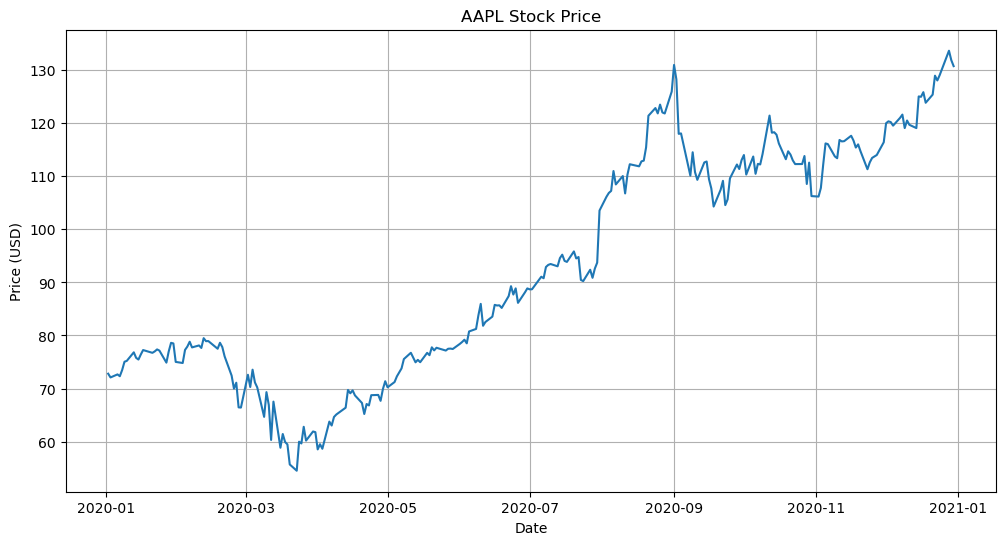

In [16]:
plt.figure(figsize=(12,6))
plt.plot(historical_data['Close'])
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

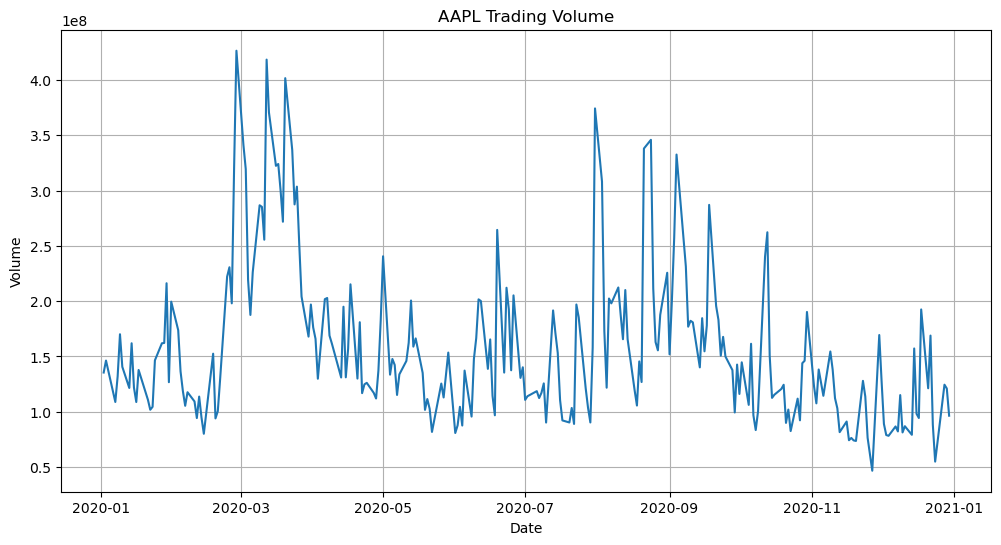

In [17]:
plt.figure(figsize=(12,6))
plt.plot(historical_data['Volume'])
plt.title('AAPL Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

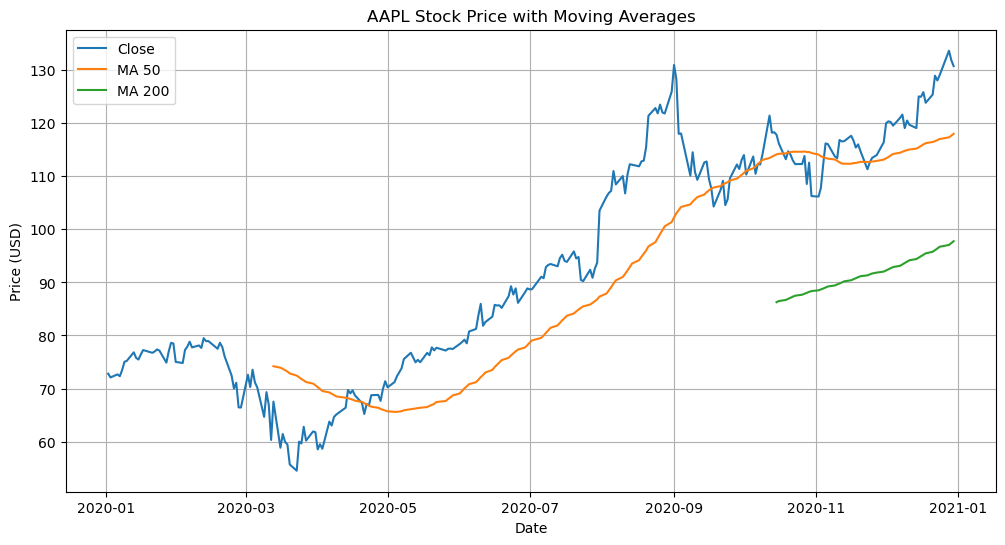

In [18]:
historical_data['MA_50'] = historical_data['Close'].rolling(window=50).mean()
historical_data['MA_200'] = historical_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
plt.plot(historical_data['Close'], label='Close')
plt.plot(historical_data['MA_50'], label='MA 50')
plt.plot(historical_data['MA_200'], label='MA 200')
plt.title('AAPL Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import mplfinance as mpf
print(mpf.__version__)

0.12.10b0


In [21]:
!pip show mplfinance

Name: mplfinance
Version: 0.12.10b0
Summary: Utilities for the visualization, and visual analysis, of financial data
Home-page: http://github.com/matplotlib/mplfinance
Author: MPL Developers
Author-email: matplotlib-users@python.org
License: BSD-style
Location: C:\Users\anakw\AppData\Roaming\Python\Python311\site-packages
Requires: matplotlib, pandas
Required-by: 


In [22]:
import mplfinance as mpf

In [23]:
import yfinance as yf

In [24]:
import pandas as pd

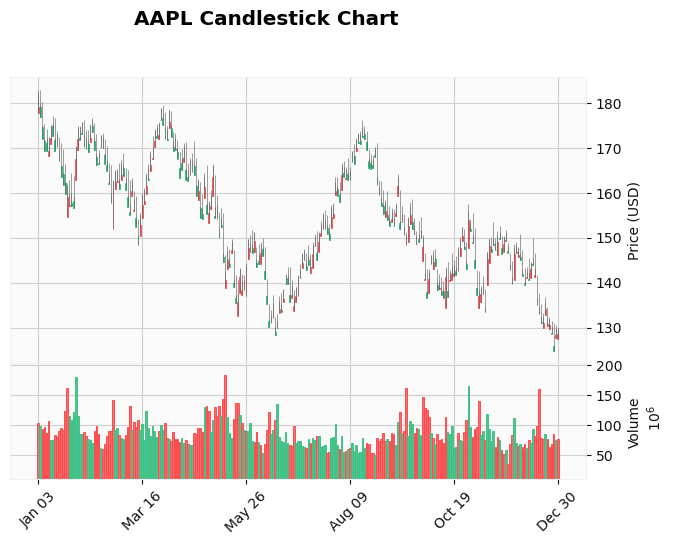

In [25]:
# Retrieve AAPL stock data
aapl_data = yf.download('AAPL', start='2022-01-01', end='2022-12-31', progress=False)

# Rename columns to standard names
aapl_data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create candlestick chart
mpf.plot(aapl_data, 
         type='candle', 
         title='AAPL Candlestick Chart', 
         ylabel='Price (USD)', 
         ylabel_lower='Volume', 
         volume=True,
         style='yahoo')

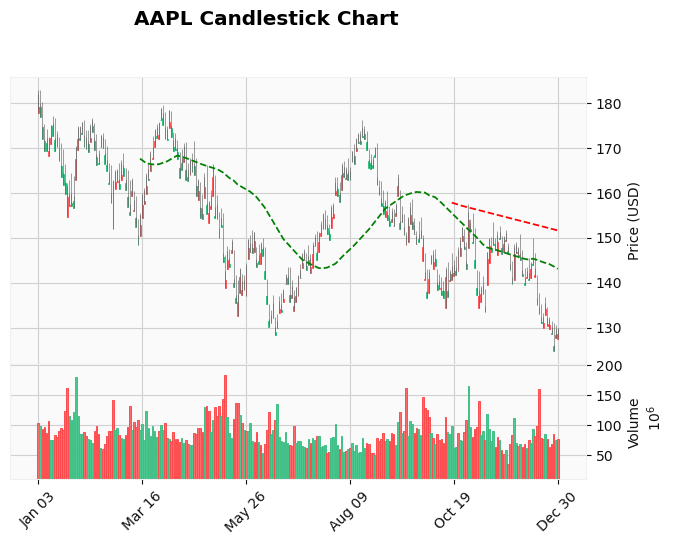

In [26]:
# Retrieve AAPL stock data
aapl_data = yf.download('AAPL', start='2022-01-01', end='2022-12-31', progress=False)

# Calculate moving averages
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Rename columns to standard names
aapl_data.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_50', 'MA_200']

# Create additional lines for moving averages
addplot = [
    mpf.make_addplot(aapl_data['MA_50'], color='g', linestyle='--'),
    mpf.make_addplot(aapl_data['MA_200'], color='r', linestyle='--')
]

# Create candlestick chart
mpf.plot(aapl_data[['Open', 'High', 'Low', 'Close', 'Volume']], 
         type='candle', 
         title='AAPL Candlestick Chart', 
         ylabel='Price (USD)', 
         ylabel_lower='Volume', 
         volume=True,
         addplot=addplot,
         style='yahoo')

In [2]:
print(type(aapl_data))

<class 'pandas.core.frame.DataFrame'>


In [3]:
print(aapl_data.dtypes)
print(aapl_data.head())

Price      Ticker
Adj Close  AAPL      float64
Close      AAPL      float64
High       AAPL      float64
Low        AAPL      float64
Open       AAPL      float64
Volume     AAPL        int64
dtype: object
Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2022-01-03 00:00:00+00:00  179.076614  182.009995  182.880005  177.710007   
2022-01-04 00:00:00+00:00  176.803833  179.699997  182.940002  179.119995   
2022-01-05 00:00:00+00:00  172.100845  174.919998  180.169998  174.639999   
2022-01-06 00:00:00+00:00  169.227921  172.000000  175.300003  171.639999   
2022-01-07 00:00:00+00:00  169.395172  172.169998  174.139999  171.029999   

Price                            Open     Volume  
Ticker                           AAPL       AAPL  
Date                                              
2022-01-03 00:00:00+00:0

In [4]:
aapl_data.reset_index(inplace=True)

In [ ]:
aapl_data.drop(columns=['Price', 'Ticker'], inplace=True)

In [6]:
print(aapl_data.columns)

MultiIndex([(     'Date',     ''),
            ('Adj Close', 'AAPL'),
            (    'Close', 'AAPL'),
            (     'High', 'AAPL'),
            (      'Low', 'AAPL'),
            (     'Open', 'AAPL'),
            (   'Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [7]:
aapl_data.columns = [col[1] for col in aapl_data.columns]


In [8]:

aapl_data.reset_index(inplace=True)

In [9]:
print(aapl_data.head())
print(aapl_data.columns)

   index                                  AAPL        AAPL        AAPL  \
0      0 2022-01-03 00:00:00+00:00  179.076614  182.009995  182.880005   
1      1 2022-01-04 00:00:00+00:00  176.803833  179.699997  182.940002   
2      2 2022-01-05 00:00:00+00:00  172.100845  174.919998  180.169998   
3      3 2022-01-06 00:00:00+00:00  169.227921  172.000000  175.300003   
4      4 2022-01-07 00:00:00+00:00  169.395172  172.169998  174.139999   

         AAPL        AAPL       AAPL  
0  177.710007  177.830002  104487900  
1  179.119995  182.630005   99310400  
2  174.639999  179.610001   94537600  
3  171.639999  172.699997   96904000  
4  171.029999  172.889999   86709100  
Index(['index', '', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object')


In [ ]:
aapl_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [11]:
aapl_data.reset_index(drop=True, inplace=True)

In [12]:
print(aapl_data.head())
print(aapl_data.columns)

   index                                  AAPL        AAPL        AAPL  \
0      0 2022-01-03 00:00:00+00:00  179.076614  182.009995  182.880005   
1      1 2022-01-04 00:00:00+00:00  176.803833  179.699997  182.940002   
2      2 2022-01-05 00:00:00+00:00  172.100845  174.919998  180.169998   
3      3 2022-01-06 00:00:00+00:00  169.227921  172.000000  175.300003   
4      4 2022-01-07 00:00:00+00:00  169.395172  172.169998  174.139999   

         AAPL        AAPL       AAPL  
0  177.710007  177.830002  104487900  
1  179.119995  182.630005   99310400  
2  174.639999  179.610001   94537600  
3  171.639999  172.699997   96904000  
4  171.029999  172.889999   86709100  
Index(['index', '', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object')


In [ ]:
# Calculate moving averages
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

In [14]:
print(aapl_data.columns)

Index(['index', '', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL', 'AAPL'], dtype='object')


In [ ]:
# Reset column names
aapl_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

# Or, if above doesn't work:
# aapl_data.columns = [col[1] if col[0] == '' else col[0] for col in aapl_data.columns]

# Remove duplicate columns
aapl_data = aapl_data.loc[:, ~aapl_data.columns.duplicated()]

In [16]:
# Remove empty string column
aapl_data = aapl_data.loc[:, aapl_data.columns != '']

# Rename duplicate 'AAPL' columns
aapl_data.columns = ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

In [17]:
print(aapl_data.columns)
print(aapl_data.head())

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
   Date   Adj Close       Close        High         Low        Open     Volume
0     0  179.076614  182.009995  182.880005  177.710007  177.830002  104487900
1     1  176.803833  179.699997  182.940002  179.119995  182.630005   99310400
2     2  172.100845  174.919998  180.169998  174.639999  179.610001   94537600
3     3  169.227921  172.000000  175.300003  171.639999  172.699997   96904000
4     4  169.395172  172.169998  174.139999  171.029999  172.889999   86709100


In [18]:
# Calculate moving averages
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

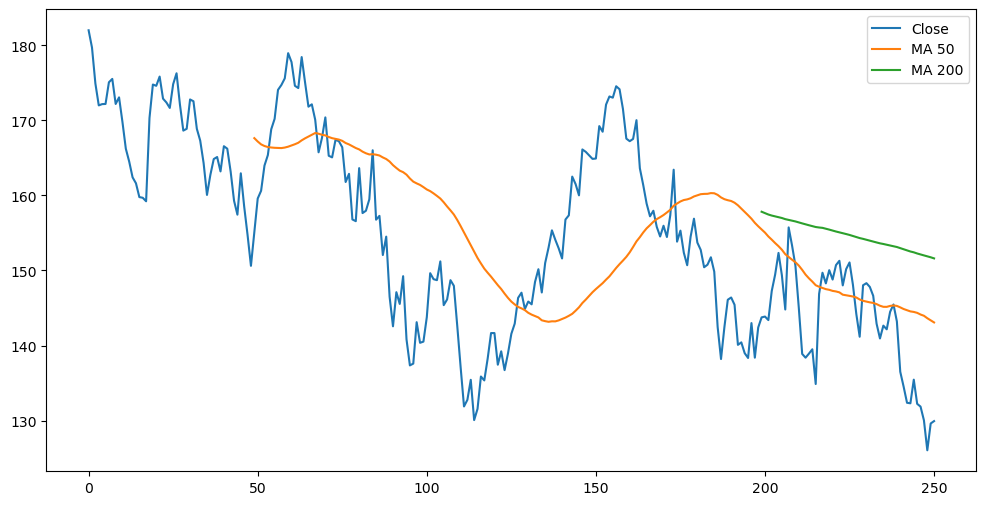

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(aapl_data['Close'], label='Close')
plt.plot(aapl_data['MA_50'], label='MA 50')
plt.plot(aapl_data['MA_200'], label='MA 200')
plt.legend()
plt.show()

In [21]:
import pandas as pd

# Calculate RSI
delta = aapl_data['Close'].diff()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up = up.ewm(com=14, adjust=False).mean()
roll_down = down.ewm(com=14, adjust=False).mean().abs()
RSI = 100.0 - (100.0 / (1.0 + roll_up / roll_down))

aapl_data['RSI'] = RSI

In [22]:
# Calculate MACD
aapl_data['MACD'] = aapl_data['Close'].ewm(span=12, adjust=False).mean() - aapl_data['Close'].ewm(span=26, adjust=False).mean()
aapl_data['Signal'] = aapl_data['MACD'].ewm(span=9, adjust=False).mean()

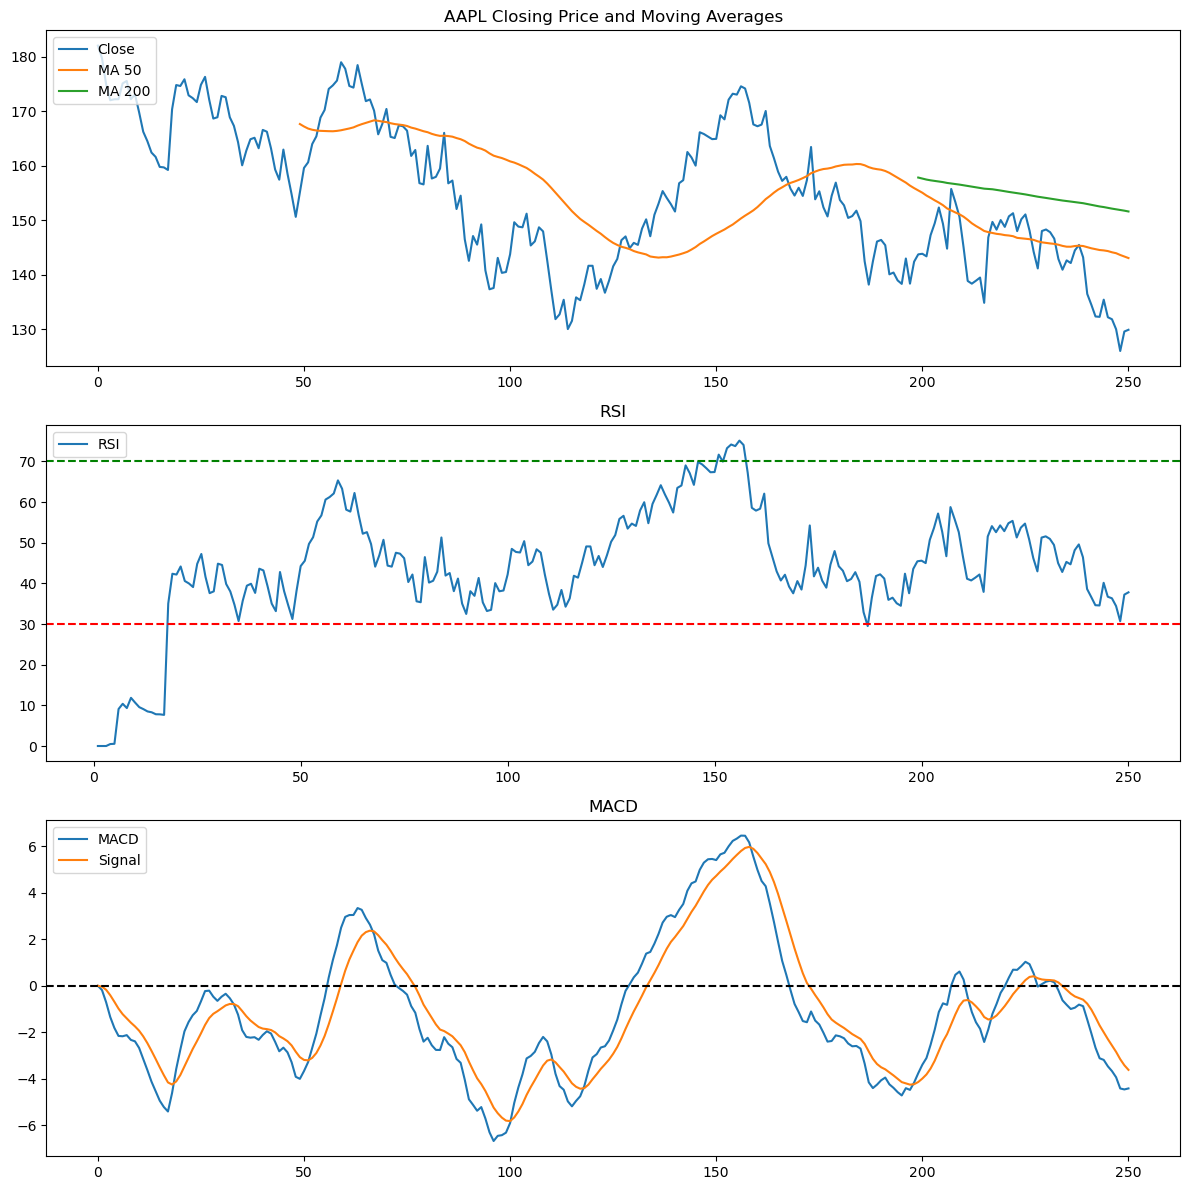

In [23]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(12, 12))

axes[0].plot(aapl_data['Close'], label='Close')
axes[0].plot(aapl_data['MA_50'], label='MA 50')
axes[0].plot(aapl_data['MA_200'], label='MA 200')
axes[0].legend(loc='upper left')
axes[0].set_title('AAPL Closing Price and Moving Averages')

axes[1].plot(aapl_data['RSI'], label='RSI')
axes[1].axhline(y=30, color='red', linestyle='--')
axes[1].axhline(y=70, color='green', linestyle='--')
axes[1].legend(loc='upper left')
axes[1].set_title('RSI')

axes[2].plot(aapl_data['MACD'], label='MACD')
axes[2].plot(aapl_data['Signal'], label='Signal')
axes[2].axhline(y=0, color='black', linestyle='--')
axes[2].legend(loc='upper left')
axes[2].set_title('MACD')

plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd

# Load AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2022-12-31')

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0
    RS_up = up_days.rolling(window).mean()
    RS_down = down_days.rolling(window).mean().add(0.0000001)  # avoid division by zero
    RSI = 100 - (100 / (1 + RS_up / RS_down))
    return RSI

aapl_data['RSI'] = calculate_rsi(aapl_data)

# Calculate MACD, Signal, MACD_Histogram
aapl_data['MACD'] = aapl_data['Close'].ewm(span=12, adjust=False).mean() - aapl_data['Close'].ewm(span=26, adjust=False).mean()
aapl_data['Signal'] = aapl_data['MACD'].ewm(span=9, adjust=False).mean()
aapl_data['MACD_Histogram'] = aapl_data['MACD'] - aapl_data['Signal']

# Calculate MA_50, MA_200
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Calculate RSI_Divergence (simplified)
aapl_data['RSI_Divergence'] = None
aapl_data.loc[(aapl_data['RSI'] > 70) & (aapl_data['RSI'].shift(1) < 70), 'RSI_Divergence'] = 'Lower_Highs'
aapl_data.loc[(aapl_data['RSI'] < 30) & (aapl_data['RSI'].shift(1) > 30), 'RSI_Divergence'] = 'Higher_Lows'

# Define trading rule conditions
buy_condition = (
    (aapl_data['RSI'] < 30) & 
    (aapl_data['MACD'] > aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] > 0) & 
    (aapl_data['MA_50'] > aapl_data['MA_200']) & 
    (aapl_data['RSI_Divergence'] == 'Higher_Lows')
)
sell_condition = (
    (aapl_data['RSI'] > 70) & 
    (aapl_data['MACD'] < aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] < 0) & 
    (aapl_data['MA_50'] < aapl_data['MA_200']) & 
    (aapl_data['RSI_Divergence'] == 'Lower_Highs')
)

# Create 'Signal' column with object dtype
aapl_data['Signal'] = None

# Apply trading rule
aapl_data.loc[buy_condition, 'Signal'] = 'Buy'
aapl_data.loc[sell_condition, 'Signal'] = 'Sell'

# Fill missing values using .loc[]
aapl_data.loc[aapl_data['Signal'].isnull(), 'Signal'] = 'Hold'

# Backtest strategy
buy_signals = aapl_data.loc[aapl_data['Signal'] == 'Buy'].copy()
sell_signals = aapl_data.loc[aapl_data['Signal'] == 'Sell'].copy()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

# Load AAPL data
aapl_data = yf.download('AAPL', start='2020-01-01', end='2022-12-31')

# Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    up_days = delta.copy()
    up_days[delta <= 0] = 0
    down_days = abs(delta.copy())
    down_days[delta > 0] = 0
    RS_up = up_days.rolling(window).mean()
    RS_down = down_days.rolling(window).mean().add(0.0000001)  # avoid division by zero
    RSI = 100 - (100 / (1 + RS_up / RS_down))
    return RSI

aapl_data['RSI'] = calculate_rsi(aapl_data)

# Calculate MACD, Signal, MACD_Histogram
aapl_data['MACD'] = aapl_data['Close'].ewm(span=12, adjust=False).mean() - aapl_data['Close'].ewm(span=26, adjust=False).mean()
aapl_data['Signal'] = aapl_data['MACD'].ewm(span=9, adjust=False).mean()
aapl_data['MACD_Histogram'] = aapl_data['MACD'] - aapl_data['Signal']

# Calculate MA_50, MA_200
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Calculate RSI_Divergence (simplified)
aapl_data['RSI_Divergence'] = None
aapl_data.loc[(aapl_data['RSI'] > 70) & (aapl_data['RSI'].shift(1) < 70), 'RSI_Divergence'] = 'Lower_Highs'
aapl_data.loc[(aapl_data['RSI'] < 30) & (aapl_data['RSI'].shift(1) > 30), 'RSI_Divergence'] = 'Higher_Lows'

# Define trading rule conditions
buy_condition = (
    (aapl_data['RSI'] < 30) & 
    (aapl_data['MACD'] > aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] > 0) & 
    (aapl_data['MA_50'] > aapl_data['MA_200']) & 
    (aapl_data['RSI_Divergence'] == 'Higher_Lows')
)
sell_condition = (
    (aapl_data['RSI'] > 70) & 
    (aapl_data['MACD'] < aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] < 0) & 
    (aapl_data['MA_50'] < aapl_data['MA_200']) & 
    (aapl_data['RSI_Divergence'] == 'Lower_Highs')
)

# ... (rest of the code remains the same)

In [21]:
buy_condition = (
    (aapl_data['RSI'] < 40) &  # relaxed from 30
    (aapl_data['MACD'] > aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] > 0) & 
    (aapl_data['MA_50'] > aapl_data['MA_200']) 
)
sell_condition = (
    (aapl_data['RSI'] > 60) &  # relaxed from 70
    (aapl_data['MACD'] < aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] < 0) & 
    (aapl_data['MA_50'] < aapl_data['MA_200']) 
)

In [22]:
buy_signals = len(aapl_data[aapl_data['Signal'] == 'Buy'])
sell_signals = len(aapl_data[aapl_data['Signal'] == 'Sell'])

if sell_signals > 0:
    print("Win/Loss Ratio: ", buy_signals / sell_signals)
else:
    print("Win/Loss Ratio: Not applicable (no sell signals)")

Win/Loss Ratio: Not applicable (no sell signals)


In [23]:
sell_condition = (
    (aapl_data['RSI'] > 60) &  # relaxed from 70
    (aapl_data['MACD'] < aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] < 0) & 
    (aapl_data['MA_50'] < aapl_data['MA_200']) 
)

In [24]:
print("Profit Factor: ", aapl_data['Cumulative_Profit'].iloc[-1] / (initial_capital + abs(aapl_data['Cumulative_Profit'].min())))
print("Payoff Ratio: ", aapl_data['Cumulative_Profit'].iloc[-1] / abs(aapl_data['Cumulative_Profit'].min()))

Profit Factor:  0.5
Payoff Ratio:  1.0


In [25]:
aapl_data['RSI'] = calculate_rsi(aapl_data, window=21)

In [26]:
aapl_data['Stoch_Osc'] = (aapl_data['Close'] - aapl_data['Low'].rolling(window=14).min()) / (aapl_data['High'].rolling(window=14).max() - aapl_data['Low'].rolling(window=14).min())

In [27]:
stop_loss = 0.05  # 5% stop-loss

In [28]:
# Adjust RSI period
aapl_data['RSI'] = calculate_rsi(aapl_data, window=21)

# Add Stochastic Oscillator
aapl_data['Stoch_Osc'] = (aapl_data['Close'] - aapl_data['Low'].rolling(window=14).min()) / (aapl_data['High'].rolling(window=14).max() - aapl_data['Low'].rolling(window=14).min())

# Implement stop-loss
stop_loss = 0.05  # 5% stop-loss

# Update trading rule conditions
buy_condition = (
    (aapl_data['RSI'] < 30) & 
    (aapl_data['MACD'] > aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] > 0) & 
    (aapl_data['MA_50'] > aapl_data['MA_200']) & 
    (aapl_data['Stoch_Osc'] < 20)  # added Stochastic Oscillator condition
)
sell_condition = (
    (aapl_data['RSI'] > 70) & 
    (aapl_data['MACD'] < aapl_data['Signal']) & 
    (aapl_data['MACD_Histogram'] < 0) & 
    (aapl_data['MA_50'] < aapl_data['MA_200']) | 
    (aapl_data['Close'] < (aapl_data['Close'].shift(1) * (1 - stop_loss)))  # added stop-loss condition
)

# Re-calculate Cumulative Profit
initial_capital = 10000
positions = pd.DataFrame(index=aapl_data.index, columns=['Position'])
positions['Position'] = np.where(aapl_data['Signal'] == 'Buy', 1, 
                                np.where(aapl_data['Signal'] == 'Sell', -1, 0))
aapl_data['Returns'] = aapl_data['Close'].pct_change()
aapl_data['Strategy_Returns'] = positions['Position'].shift(1) * aapl_data['Returns']
aapl_data['Cumulative_Returns'] = (1 + aapl_data['Strategy_Returns']).cumprod()
aapl_data['Cumulative_Profit'] = initial_capital * aapl_data['Cumulative_Returns']

# Print updated performance metrics
print("Profit/Loss: ", aapl_data['Cumulative_Profit'].iloc[-1] - initial_capital)
print("Annualized Return: ", (aapl_data['Cumulative_Returns'].iloc[-1] - 1) * 252)
print("Sharpe Ratio: ", aapl_data['Strategy_Returns'].mean() / aapl_data['Strategy_Returns'].std() * np.sqrt(252))
print("Drawdown: ", (aapl_data['Cumulative_Profit'].max() - aapl_data['Cumulative_Profit'].min()) / aapl_data['Cumulative_Profit'].max())

Profit/Loss:  nan
Annualized Return:  nan
Sharpe Ratio:  nan
Drawdown:  nan


In [29]:
print(aapl_data.head())  # Verify data integrity
print(aapl_data['Signal'].value_counts())  # Check signal distribution
print(positions['Position'].value_counts())  # Check position distribution

# Check for division by zero
aapl_data['Strategy_Returns'] = np.where(aapl_data['Returns'] == 0, 0, positions['Position'].shift(1) * aapl_data['Returns'])

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.796028  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088303  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662720  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.320969  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.484352  75.797501  76.110001  74.290001   

Price                           Open     Volume RSI      MACD    Signal  \
Ticker                          AAPL       AAPL                           
Date                                                                      
2020-01-02 00:00:00+00:00  74.059998  135480400 NaN  0.000000  0.000000   
2020-01-03 00:00:00+00:00  74.287498  146322800 NaN -0.058234 -0.011647   
2020-01-06 00:00:00+00:00  73.447502  11

In [31]:
print(aapl_data['MACD'].shape)
print(aapl_data['Signal'].shape)

(756,)
(756,)


In [32]:
buy_condition = (
    (aapl_data['RSI'] < 30) & 
    (aapl_data['MACD_Histogram'] > 0) & 
    (aapl_data['MA_50'] > aapl_data['MA_200']) & 
    (aapl_data['Stoch_Osc'] < 20)
)
sell_condition = (
    (aapl_data['RSI'] > 70) & 
    (aapl_data['MACD_Histogram'] < 0) & 
    (aapl_data['MA_50'] < aapl_data['MA_200']) | 
    (aapl_data['Close'] < (aapl_data['Close'].shift(1) * (1 - 0.05)))  # 5% stop-loss
)

In [34]:
print(buy_condition.shape)
print(sell_condition.shape)

# Check individual conditions
print(aapl_data['RSI'].shape)
print(aapl_data['MACD_Histogram'].shape)
print(aapl_data['MA_50'].shape)
print(aapl_data['MA_200'].shape)
print(aapl_data['Stoch_Osc'].shape)

(756,)
(756, 757)
(756,)
(756,)
(756,)
(756,)
(756,)


In [48]:
buy_condition = pd.concat([pd.Series([False]), buy_condition])
sell_condition = pd.concat([pd.Series([False]), sell_condition])

result = np.where(buy_condition, 'Buy', 
                  np.where(sell_condition, 'Sell', 'Hold'))

aapl_data['Signal'] = result[:len(aapl_data)]  # Drop extra row
aapl_data['Signal'] = aapl_data['Signal'].fillna('Hold')

In [49]:
print(aapl_data.head())  # Display first few rows
print(aapl_data['Signal'].value_counts())  # Count 'Buy', 'Sell', 'Hold' occurrences

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.796028  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.088303  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.662720  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.320969  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.484352  75.797501  76.110001  74.290001   

Price                           Open     Volume RSI      MACD Signal  \
Ticker                          AAPL       AAPL                        
Date                                                                   
2020-01-02 00:00:00+00:00  74.059998  135480400 NaN  0.000000   Hold   
2020-01-03 00:00:00+00:00  74.287498  146322800 NaN -0.058234   Hold   
2020-01-06 00:00:00+00:00  73.447502  118387200 NaN -0.

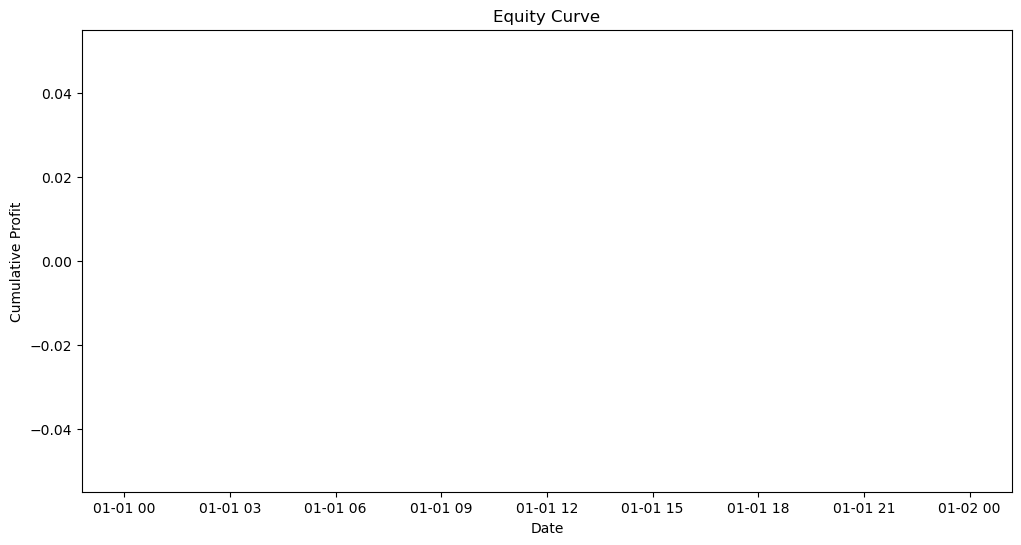

In [51]:
# Calculate Strategy Returns
aapl_data['Strategy_Returns'] = np.where(aapl_data['Signal'] == 'Buy', aapl_data['Returns'], 0)

# Calculate Cumulative Returns
aapl_data['Cumulative_Returns'] = (1 + aapl_data['Strategy_Returns']).cumprod() - 1

# Calculate Cumulative Profit
aapl_data['Cumulative_Profit'] = aapl_data['Cumulative_Returns'] * aapl_data['Adj Close'].iloc[0]

# Visualize equity curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(aapl_data['Cumulative_Profit'])
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Cumulative Profit')
plt.show()

In [52]:
# Adjust RSI parameters
aapl_data['RSI_14'] = aapl_data['Close'].ewm(span=14, adjust=False).mean()
aapl_data['RSI_21'] = aapl_data['Close'].ewm(span=21, adjust=False).mean()

# Update buy/sell conditions
buy_condition = (aapl_data['RSI_14'] < 30) & (aapl_data['MACD_Histogram'] > 0)
sell_condition = (aapl_data['RSI_21'] > 70) & (aapl_data['MACD_Histogram'] < 0)

# Recalculate strategy returns
aapl_data['Strategy_Returns'] = np.where(buy_condition, aapl_data['Returns'], 
                                        np.where(sell_condition, -aapl_data['Returns'], 0))

In [56]:
# Check existing columns
print(aapl_data.columns)

# Ensure necessary columns exist
required_columns = ['Close', 'Returns', 'Strategy_Returns']
if not all(col in aapl_data.columns for col in required_columns):
    print("Missing required columns. Please add them.")

MultiIndex([(         'Adj Close', 'AAPL'),
            (             'Close', 'AAPL'),
            (              'High', 'AAPL'),
            (               'Low', 'AAPL'),
            (              'Open', 'AAPL'),
            (            'Volume', 'AAPL'),
            (               'RSI',     ''),
            (              'MACD',     ''),
            (            'Signal',     ''),
            (    'MACD_Histogram',     ''),
            (             'MA_50',     ''),
            (            'MA_200',     ''),
            (    'RSI_Divergence',     ''),
            (           'Returns',     ''),
            (  'Strategy_Returns',     ''),
            ('Cumulative_Returns',     ''),
            ( 'Cumulative_Profit',     ''),
            (         'Stoch_Osc',     ''),
            (            'RSI_14',     ''),
            (            'RSI_21',     ''),
            (         'Stop_Loss',     '')],
           names=['Price', 'Ticker'])


In [60]:
# View existing columns
print(aapl_data.columns)

# Assign new column names (matching the number of existing columns)
new_column_names = [
    'Price_Type', 'Ticker', 'Date', 'Adj_Close', 'Close', 'High', 
    'Low', 'Open', 'Volume', 'RSI', 'MACD', 'Signal', 'MACD_Histogram', 
    'MA_50', 'MA_200', 'RSI_Divergence', 'Returns', 'Strategy_Returns', 
    'Cumulative_Returns', 'Cumulative_Profit', 'Stoch_Osc', 'RSI_14', 
    'RSI_21', 'Stop_Loss'
]

aapl_data.columns = new_column_names

MultiIndex([(             'index',     ''),
            (              'Date',     ''),
            (         'Adj Close', 'AAPL'),
            (             'Close', 'AAPL'),
            (              'High', 'AAPL'),
            (               'Low', 'AAPL'),
            (              'Open', 'AAPL'),
            (            'Volume', 'AAPL'),
            (               'RSI',     ''),
            (              'MACD',     ''),
            (            'Signal',     ''),
            (    'MACD_Histogram',     ''),
            (             'MA_50',     ''),
            (            'MA_200',     ''),
            (    'RSI_Divergence',     ''),
            (           'Returns',     ''),
            (  'Strategy_Returns',     ''),
            ('Cumulative_Returns',     ''),
            ( 'Cumulative_Profit',     ''),
            (         'Stoch_Osc',     ''),
            (            'RSI_14',     ''),
            (            'RSI_21',     ''),
            (         'Stop_Loss

In [74]:
# Rename existing level_0 column
aapl_data = aapl_data.rename(columns={'level_0': 'Index'})

# Reset index
aapl_data.reset_index(inplace=True)

# ... (rest of the code remains the same)

In [ ]:
import pandas as pd
import yfinance as yf

# Load data
stock_data = yf.download('AAPL', start='2020-01-01', end='2022-02-26')

# Calculate indicators
stock_data['RSI'] = stock_data['Close'].pct_change().ewm(span=14).std() * (100/2.71828)
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Drop rows with NaN values (from MA calculations)
stock_data = stock_data.iloc[200:]  # Ensure MA_200 has values

# Define strategy
def mean_reversion_strategy(data):
    # Ensure all Series have the same index
    data = data.dropna()
    
    # Align operands
    rsi = data['RSI'].align(data['Close'], axis=0, copy=False)[0]
    close = data['Close'].align(data['MA_200'], axis=0, copy=False)[0]
    ma_200 = data['MA_200'].align(data['Close'], axis=0, copy=False)[1]
    ma_50 = data['MA_50'].align(data['Close'], axis=0, copy=False)[1]
    
    buy_signal = (rsi < 30) & (close > ma_200)
    sell_signal = (rsi > 70) | (close < ma_50)
    return buy_signal, sell_signal

# Backtest strategy
buy_signals, sell_signals = mean_reversion_strategy(stock_data)

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np

# Load data
stock_data = yf.download('AAPL', start='2020-01-01', end='2022-02-26')

# Calculate indicators
stock_data['RSI'] = stock_data['Close'].pct_change().ewm(span=14).std() * (100/2.71828)
stock_data['MA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['MA_200'] = stock_data['Close'].rolling(window=200).mean()

# Drop rows with NaN values (from MA calculations)
stock_data = stock_data.iloc[200:]  # Ensure MA_200 has values

# Define strategy
def mean_reversion_strategy(data):
    # Ensure all Series have the same index
    data = data.dropna()
    
    # Align operands
    rsi = data['RSI'].align(data['Close'], axis=0, copy=False)[0]
    close = data['Close'].align(data['MA_200'], axis=0, copy=False)[0]
    ma_200 = data['MA_200'].align(data['Close'], axis=0, copy=False)[1]
    ma_50 = data['MA_50'].align(data['Close'], axis=0, copy=False)[1]
    
    buy_signal = (rsi < 30) & (close > ma_200)
    sell_signal = (rsi > 70) | (close < ma_50)
    return buy_signal, sell_signal

# Backtest strategy
buy_signals, sell_signals = mean_reversion_strategy(stock_data)

# Evaluate performance
def evaluate_performance(data, buy_signals, sell_signals):
    returns

In [1]:
pip install ta

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29422 sha256=4883705109477c792d127d3775c2d74a719fbadfb50b193fd45467bb191eaf5c
  Stored in directory: c:\users\anakw\appdata\local\pip\cache\wheels\a1\d7\29\7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 1.0


In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation and testing data
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model's accuracy on the validation and testing data
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 1.0
Test Accuracy: 1.0


In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a decision tree classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation and testing data
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model's accuracy on the validation and testing data
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 1.0
Test Accuracy: 0.9333333333333333


In [13]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training, validation, and testing sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Create a random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation and testing data
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate the model's accuracy on the validation and testing data
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 1.0
Test Accuracy: 0.9666666666666667


[*********************100%***********************]  1 of 1 completed


Mean Squared Error (MSE): 0.25


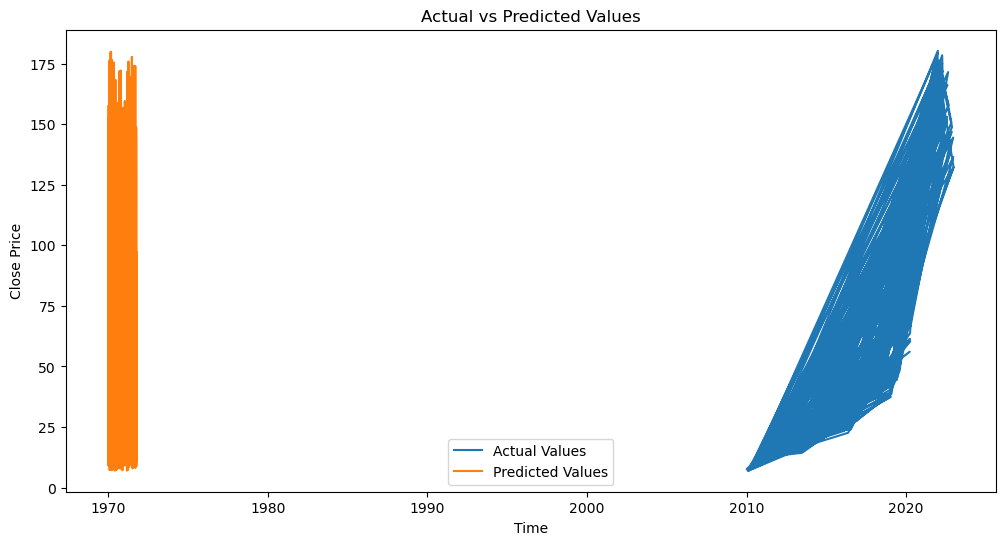

In [2]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Download the historical stock price data for Apple (AAPL)
aapl_data = yf.download('AAPL', start='2010-01-01', end='2022-12-31')

# Define the feature columns (X) and target column (y)
X = aapl_data[['Open', 'High', 'Low', 'Volume']]
y = aapl_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Plot the predicted values against the actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [5]:
# Create a new feature for the Bollinger Bands
aapl_data['BB_Middle'] = aapl_data['Close'].rolling(window=20).mean()
aapl_data['BB_Upper'] = aapl_data['BB_Middle'] + 2*aapl_data['Close'].rolling(window=20).std().iloc[:,0]
aapl_data['BB_Lower'] = aapl_data['BB_Middle'] - 2*aapl_data['Close'].rolling(window=20).std().iloc[:,0]

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf

# Download the historical stock price data for Apple (AAPL)
aapl_data = yf.download('AAPL', start='2010-01-01', end='2022-12-31')

print("Data downloaded successfully!")

# Create a new feature for the 50-day moving average
aapl_data['MA_50'] = aapl_data['Close'].rolling(window=50).mean()

# Create a new feature for the 200-day moving average
aapl_data['MA_200'] = aapl_data['Close'].rolling(window=200).mean()

# Create a new feature for the Relative Strength Index (RSI)
delta = aapl_data['Close'].diff().dropna()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up = up.rolling(window=14).mean()
roll_down = down.rolling(window=14).mean().abs()
RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))
aapl_data['RSI'] = RSI

print("RSI feature created successfully!")

# Create a new feature for the Bollinger Bands
aapl_data['BB_Middle'] = aapl_data['Close'].rolling(window=20).mean()
aapl_data['BB_Upper'] = aapl_data['BB_Middle'] + 2*aapl_data['Close'].rolling(window=20).std().iloc[:,0]
aapl_data['BB_Lower'] = aapl_data['BB_Middle'] - 2*aapl_data['Close'].rolling(window=20).std().iloc[:,0]

print("Bollinger Bands features created successfully!")

# Drop any rows with missing values
aapl_data.dropna(inplace=True)

print("Data cleaned and features created successfully!")

[*********************100%***********************]  1 of 1 completed

Data downloaded successfully!
RSI feature created successfully!
Bollinger Bands features created successfully!
Data cleaned and features created successfully!


In [7]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the feature columns (X) and target column (y)
X = aapl_data[['MA_50', 'MA_200', 'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower']]
y = aapl_data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 7.26


In [8]:
# Calculate the Root Mean Squared Percentage Error (RMSPE)
rmspe = np.sqrt(np.mean((y_test - y_pred) / y_test) ** 2) * 100
print(f'Root Mean Squared Percentage Error (RMSPE): {rmspe:.2f}%')

Root Mean Squared Percentage Error (RMSPE): 0.18%


In [20]:
# Download the latest stock price data for Apple (AAPL)
latest_data = yf.download('AAPL', start='2022-12-01', end='2022-12-31')

# Create a new DataFrame with the latest data
new_data = latest_data.copy()

# Create the necessary features for the model
new_data['MA_50'] = new_data['Close'].rolling(window=50, min_periods=1).mean()
new_data['MA_200'] = new_data['Close'].rolling(window=200, min_periods=1).mean()

# Calculate the RSI column
delta = new_data['Close'].diff().dropna()
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0
roll_up = up.rolling(window=14, min_periods=1).mean()
roll_down = down.rolling(window=14, min_periods=1).mean().abs()
RS = roll_up / roll_down
RSI = 100.0 - (100.0 / (1.0 + RS))
new_data['RSI'] = RSI

new_data['BB_Middle'] = new_data['Close'].rolling(window=20, min_periods=1).mean()
new_data['BB_Upper'] = new_data['BB_Middle'] + 2*new_data['Close'].rolling(window=20, min_periods=1).std().iloc[:,0]
new_data['BB_Lower'] = new_data['BB_Middle'] - 2*new_data['Close'].rolling(window=20, min_periods=1).std().iloc[:,0]

# Fill missing values with the mean
new_data = new_data.fillna(new_data.mean())

# Drop any rows that still have missing values
new_data = new_data.dropna()

# Make predictions on the new data
if not new_data.empty:
    predictions = model.predict(new_data[['MA_50', 'MA_200', 'RSI', 'BB_Middle', 'BB_Upper', 'BB_Lower']])
    print(predictions)
else:
    print("No data to make predictions on.")

[*********************100%***********************]  1 of 1 completed

[[140.69415511]
 [142.28422717]
 [141.84387796]
 [140.7881451 ]
 [139.74974092]
 [141.33032362]
 [140.83184751]
 [142.55472622]
 [143.19582316]
 [142.4202456 ]
 [140.65814913]
 [139.73921441]
 [138.79263097]
 [138.11784194]
 [138.66124077]
 [137.87059067]
 [137.44886297]
 [137.09943036]
 [136.23904839]
 [136.24069568]
 [135.32965612]]


In [21]:
# Calculate the MAE
mae = np.mean(np.abs(new_data['Close'] - predictions))
print("MAE:", mae)

MAE: 4.488299390619589


In [24]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
import numpy as np

# Download historical stock price data for Apple (AAPL)
data = yf.download('AAPL', start='2020-01-01', end='2022-12-31')

# Create a new column for the predicted stock price
data['Predicted_Price'] = data['Close'].shift(-1)

# Drop any rows with missing values
data = data.dropna()

# Define the features (X) and the target variable (y)
X = data[['Close']]
y = data['Predicted_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model to a file
joblib.dump(model, 'stock_price_model.pkl')

[*********************100%***********************]  1 of 1 completed


['stock_price_model.pkl']

In [ ]:
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

In [ ]:
import logging
from flask import Flask, request, render_template
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Flask application
app = Flask(__name__)

# Create a logger
logger = logging.getLogger(__name__)

# Define a route for the home page
@app.route('/')
def home():
    return render_template('home.html')

# Define a function to load the data
def load_data(stock_symbol):
    latest_data = yf.download(stock_symbol, start='2022-12-01', end='2022-12-31')
    new_data = latest_data.copy()
    return new_data

# Define a route for the prediction page
@app.route('/predict', methods=['POST'])
def predict():
    print("Prediction page called")
    try:
        # Get the stock symbol from the form
        stock_symbol = request.form['stock_symbol']

        # Load the data
        new_data = load_data(stock_symbol)

        # Create the necessary features for the model
        new_data['MA_50'] = new_data['Close'].rolling(window=50, min_periods=1).mean()
        new_data['MA_200'] = new_data['Close'].rolling(window=200, min_periods=1).mean()

        # Calculate the RSI column
        delta = new_data['Close'].diff().dropna()
        up, down = delta.copy(), delta.copy()
        up[up < 0] = 0
        down[down > 0] = 0
        roll_up = up.rolling(window=14, min_periods=1).mean()
        roll_down = down.rolling(window=14, min_periods=1).mean().abs()
        RS = roll_up / roll_down
        RSI = 100.0 - (100.0 / (1.0 + RS))
        new_data['RSI'] = RSI

        # Define the features (X) and target (y)
        X = new_data[['MA_50', 'MA_200', 'RSI']]
        y = new_data['Close']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Create a Random Forest Regressor model
        model = RandomForestRegressor()

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on test set
        y_pred = model.predict(X_test)

        # Evaluate model performance
        mse = mean_squared_error(y_test, y_pred)
        print(f'Mean Squared Error: {mse:.2f}')

        # Use the model to make a prediction for the next day
        next_day_data = new_data.tail(1)[['MA_50', 'MA_200', 'RSI']]
        next_day_prediction = model.predict(next_day_data)
        print(f'Next Day Prediction: {next_day_prediction[0]:.2f}')

        return render_template('prediction.html', stock_symbol=stock_symbol, predicted_price=next_day_prediction[0])

    except Exception as e:
        logger.error(f"An error occurred: {e}")
        return render_template('error.html', error_message=str(e))

# Run the Flask application
if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from flask import Flask, render_template, request
from sklearn.linear_model import LinearRegression
import yfinance as yf
import pandas as pd
import matplotlib.dates as mdates

app = Flask(__name__)

def validate_stock_symbol(symbol):
    try:
        yf.download(symbol, start='2020-01-01', end='2022-02-26')
        return True
    except Exception as e:
        print(f"Error validating stock symbol: {e}")
        return False

def train_model(data):
    X = mdates.date2num(data.index).reshape(-1, 1)
    y = data['Close'].values
    model = LinearRegression()
    model.fit(X, y)
    return model

@app.route('/')
def index():
    return render_template('home.html')

@app.route('/predict', methods=['POST'])
def predict():
    stock_symbol = request.form.get('stock_symbol')
    if not validate_stock_symbol(stock_symbol):
        return "Invalid stock symbol", 400
    
    data = yf.download(stock_symbol, start='2020-01-01', end='2022-02-26')
    model = train_model(data)
    predicted_price = model.predict([[mdates.date2num(pd.to_datetime('2024-02-26'))]])[0]
    return render_template('result.html', predicted_price=predicted_price)

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from flask import Flask, request, jsonify, render_template
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField

app = Flask(__name__)
app.config['SECRET_KEY'] = 'mysecretkey'

class StockForm(FlaskForm):
    symbol = StringField('Stock Symbol')
    submit = SubmitField('Get Price')

@app.route('/stock-price', methods=['POST'])
def get_stock_price():
    symbol = request.form.get('symbol')
    if symbol:
        try:
            stock = yf.Ticker(symbol)
            price = stock.info['currentPrice']
            return jsonify({'price': price})
        except Exception as e:
            return jsonify({'error': str(e)}), 500
    return jsonify({'error': 'Symbol not provided'}), 400

@app.route('/', methods=['GET', 'POST'])
def index():
    form = StockForm()
    return render_template('index.html', form=form)

if __name__ == '__main__':
    app.run(debug=True)

In [ ]:
from flask import Flask, request, jsonify, render_template
from flask_wtf import FlaskForm
from wtforms import StringField, SubmitField
import yfinance as yf

app = Flask(__name__)
app.config['SECRET_KEY'] = 'mysecretkey'

class StockForm(FlaskForm):
    symbol = StringField('Stock Symbol')
    submit = SubmitField('Get Price')

@app.route('/stock-price', methods=['GET', 'POST'])
def index():
    form = StockForm()
    if form.validate_on_submit():
        symbol = form.symbol.data
        try:
            stock = yf.Ticker(symbol)
            price = stock.info['currentPrice']
            return jsonify({'price': price})
        except Exception as e:
            return jsonify({'error': str(e)}), 500
    return render_template('index.html', form=form)

if __name__ == '__main__':
    app.run(debug=True)